### In this exercise, we practice supervised machine learning by implementing k-nearest neighour classifier on breast cancer data set

__data souce can be found here:__ https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Import useful packages: 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Get a feel of the data:

In [2]:
# sample data:
    
bc_data=pd.read_csv('/Users/scheo/Documents/PythonPractice/sample_data/breast_cancer_data.csv')
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In this data set, id = patient id, diagnosis (M=malignant, B=benign) is the dependent variable, and everything else is considered attributes/explanatory variables for each patient.

For the sake of exercise, let's just pick two attributes, say radius_mean and concavity_mean. So in the data set, select the following: id, diagnosis,radius_mean and concavity_mean

__Note:__ we will go into more detail in the coming weeks about how to select features



In [6]:
bc_subset=bc_data[['id','diagnosis','radius_mean','concavity_mean']]

using a pivot table ( by diagnosis ) look at how radius_mean differs in each group

In [7]:

bc_subset.pivot_table(columns='diagnosis',values=['radius_mean','concavity_mean'])

diagnosis,B,M
concavity_mean,0.046058,0.160775
radius_mean,12.146524,17.462830


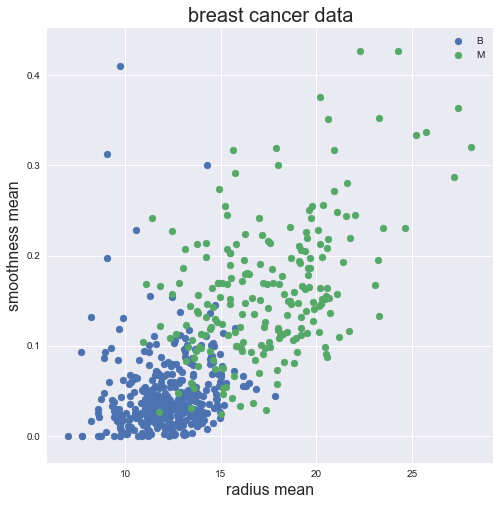

In [8]:
fig1,ax =plt.subplots(1,1,figsize=(8,8))
for d in set(bc_subset['diagnosis']):
    plt.scatter(data=bc_subset[bc_subset['diagnosis']==d],x='radius_mean',y='concavity_mean',label=str(d))
    ax.legend()
ax.set_title('breast cancer data',fontsize=20)
ax.set_xlabel('radius mean',fontsize=16)
ax.set_ylabel('smoothness mean',fontsize=16)


__Splitting data into training and testing sets:__

Idea: given a dataset, we split it into training set and testing sets by taking samples randomly. This is a way to evaluate the performance of an algorithm

For example, let's say 70% of the dataset goes into training, this means that the machine learning algorithm we're apply would be based on the observations in the 80% of the samples. For the remaining 30%, we pretend they are 'new' data, where we apply the model and predict the outcome

__There are differnt ways to split a dataset into train and test sets, for example, we can use a prepackaged module:__ 
``` python 
from sklearn.model_selection import train_test_split 
```
The inputs of the train_test_split() function are 1) you dataset and 2) the size of the test set as a proportion of the samples

Usually, the test set is small (20-30%) and the train set is larger so there is more training data for the algorithm to learn on


In [9]:
from sklearn.model_selection import train_test_split 
train,test = train_test_split(bc_subset,test_size=0.3)


In [10]:
M_ratio_train=round(100*len(train[train['diagnosis']=='M'])/len(train),2)
print('There is '+ str(M_ratio_train) + '% Malignant samples in the training set')
train.pivot_table(columns='diagnosis',aggfunc=len)


There is 33.67% Malignant samples in the training set


diagnosis,B,M
concavity_mean,264.0,134.0
id,264.0,134.0
radius_mean,264.0,134.0


In [11]:
M_ratio_test=round(100*len(test[test['diagnosis']=='M'])/len(test),2)
print('There is '+ str(M_ratio_test) + '% Malignant samples in the test set')
#len(test[test['diagnosis']=='M'])/len(test)
test.pivot_table(columns='diagnosis',aggfunc=len)


There is 45.61% Malignant samples in the test set


diagnosis,B,M
concavity_mean,93.0,78.0
id,93.0,78.0
radius_mean,93.0,78.0


__training and testing the model with kNeighborsClassifier:__

The following 4 lines of code summarize the implementation (it would be a bit longer if we try to do it from scratch)

__specify the parameters for the classifier__ 
```python
    clf= KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='uniform')
```
for kNN, we have to choose the number of neighbors to compare (n_neighbors) and a metric to evaluate their distance on 

__fitting the train set with the classifier__
```python
   clf.fit(train[['radius_mean','concavity_mean']],train['diagnosis'])
```
this is the step where the algorithm is 'learning' from the training data to build its decision boundary. Notice that, the first input for the function are the attributes and the second input is the target variable that we want to predict
  
__predict on the test set__
```python
   preds=clf.predict(test[['radius_mean','concavity_mean']])
```
after we built the model using training data, we can use it (in this case, decision boundary) to predict on the test set using the same attributes

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='uniform')
clf.fit(train[['radius_mean','concavity_mean']],train['diagnosis'])
preds=clf.predict(test[['radius_mean','concavity_mean']])

__evaluate the classifier's accuracy__
```python
accu=(np.where(preds==test['diagnosis'],1,0).sum())/len(test)
```
in this step, we compare the true labels from the test set `test['diagnosis']`


In [19]:
# Now, compare preds with test:
accu=(np.where(preds==test['diagnosis'],1,0).sum())/len(test)
print('model accuracy for this train/test trial is ' + str(100*accu)+ '%')

model accuracy for this train/test trial is 87.134502924%


__Exercise 1: try to adjust the following parameters and see how they affect the accuracy. Write your code in a new cell.__


* input settings in the classifier (n_neighbors, metric) and see how that affects the accuracy outcome

* train/test proportion

__Exercise 2: find out average accuracy rates by generating different train/test sets__

* create a for loop where a new train/test set is generated each time

* collect the accuracy result by appending it to an empty data frame (see following steps)

```python
# define empty list to store accuracy values:
accu_list=[]
# pick number of times you want to generate the trian/test set
num_trial = 50
# use np.arange() to define a list of arrays to iterate:
for i in np.arange(num_trial+1):
    # (generate test,train using the test_train_split function)
    # (define classifier)
    # (fit classifier on train set : attributes + target variable)
    # (predict on test set)
    # define accuracy of the classifier
    accu_list.append(accu)

```

Once you finished, you can use 
```python
plt.hist(accu_list)
```
to see how the classifer is doing for each trial